# Bangalore Housing Prices
#### Predict Real Estate Prices in Different Areas of Bangalore


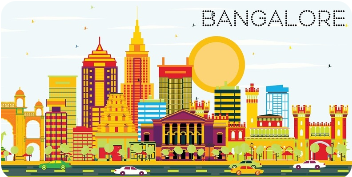

## About Dataset

### Context

The real estate markets in Bangalore / Bengaluru, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

### Columns / Features

* Area Type: Type of Plot 
* Availability: Ready to Move or Not
* Location: Region of Bangalore
* Size: BHK
* Society: Colony in which the House is Present in
* Total Sq. Ft: Total Area
* Bath: Number of Bathrooms
* Balcony: Number of Balconies
* Price: Cost in Lakhs

### Link to data set

https://www.kaggle.com/datasets/aryanfelix/bangalore-housing-prices

### Import Libraries

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Check out the Data

In [86]:
df = pd.read_csv('BHP.csv')

In [87]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [88]:
df.shape

(13320, 9)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [90]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## Exploratory Data Analysis 1

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

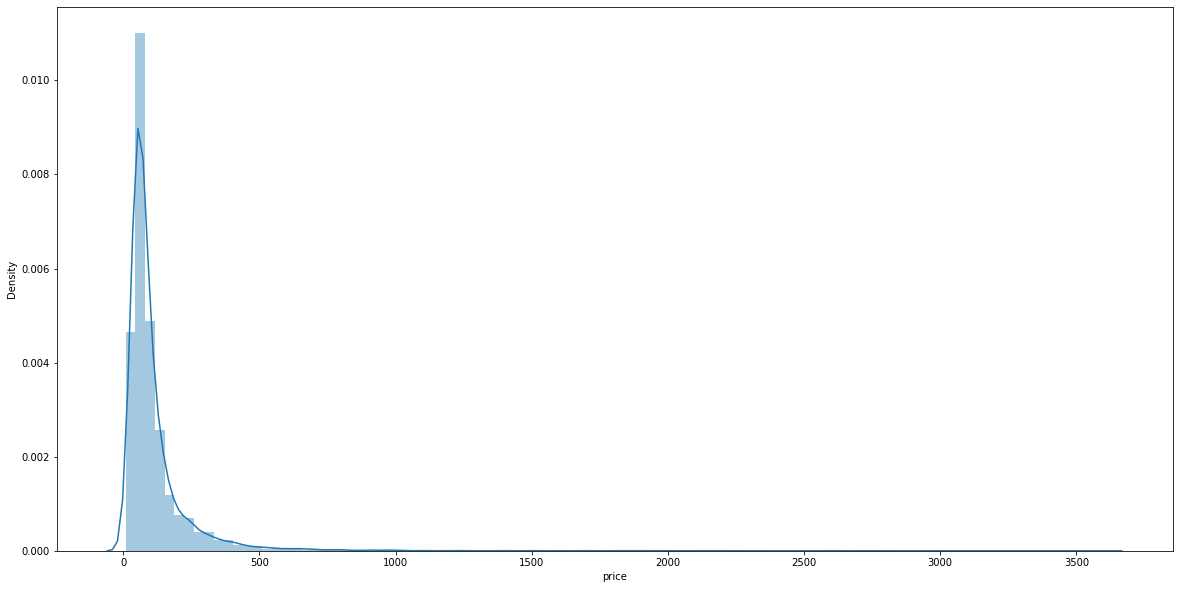

In [91]:
# As we have to predict price lets see its destribution 
plt.figure(figsize=(20,10))
sns.distplot(df['price'],bins=100)

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_type', ylabel='count'>

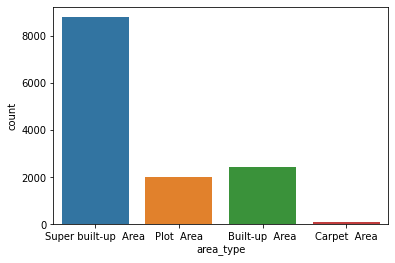

In [92]:
# Exploring area type feature
sns.countplot(df['area_type'])

In [93]:
df.groupby('area_type').mean()['price']

area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64

In [94]:
df.groupby('availability').count()['price'].sort_values(ascending=False)

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Name: price, Length: 81, dtype: int64

In [95]:
df['location'].nunique()

1305

In [96]:
df.groupby('location').mean()['price'].sort_values(ascending=False)

location
Cubbon Road                  1900.000000
Ashok Nagar                  1486.000000
Defence Colony               1167.714286
Yemlur                       1093.388889
Church Street                1068.000000
                                ...     
Celebrity Paradise Layout      19.245000
BAGUR                          17.000000
Makali                         16.000000
 Anekal                        16.000000
Alur                           15.000000
Name: price, Length: 1305, dtype: float64

In [97]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [98]:
df['society'].nunique()

2688

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bath', ylabel='count'>

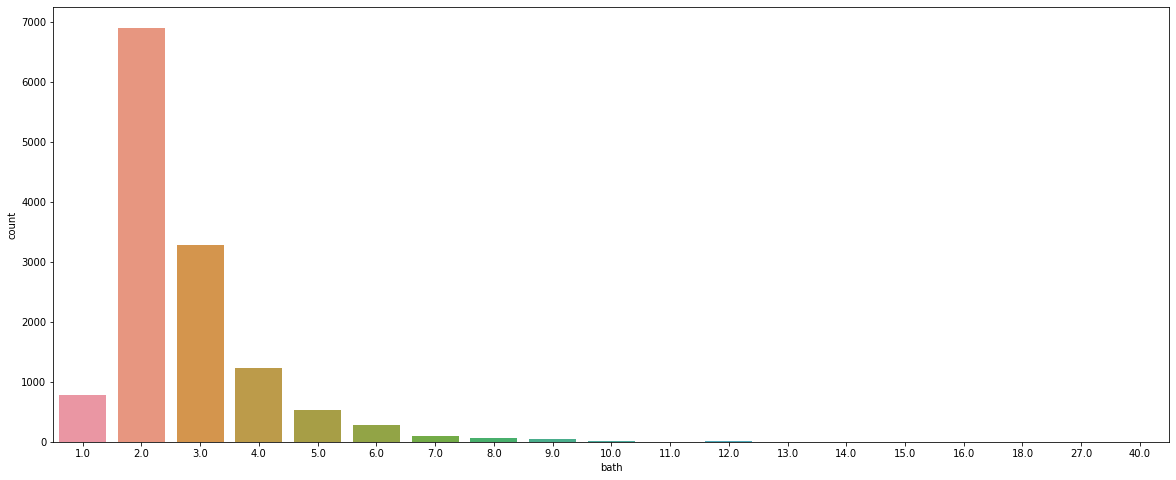

In [99]:
plt.figure(figsize=(20,8))
sns.countplot(df['bath'])

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony', ylabel='count'>

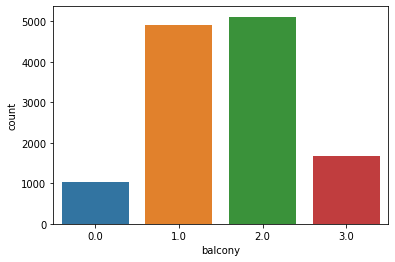

In [100]:
sns.countplot(df['balcony'])

## Data Wrangling and Data Cleaning

#### Missing Data

In [101]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

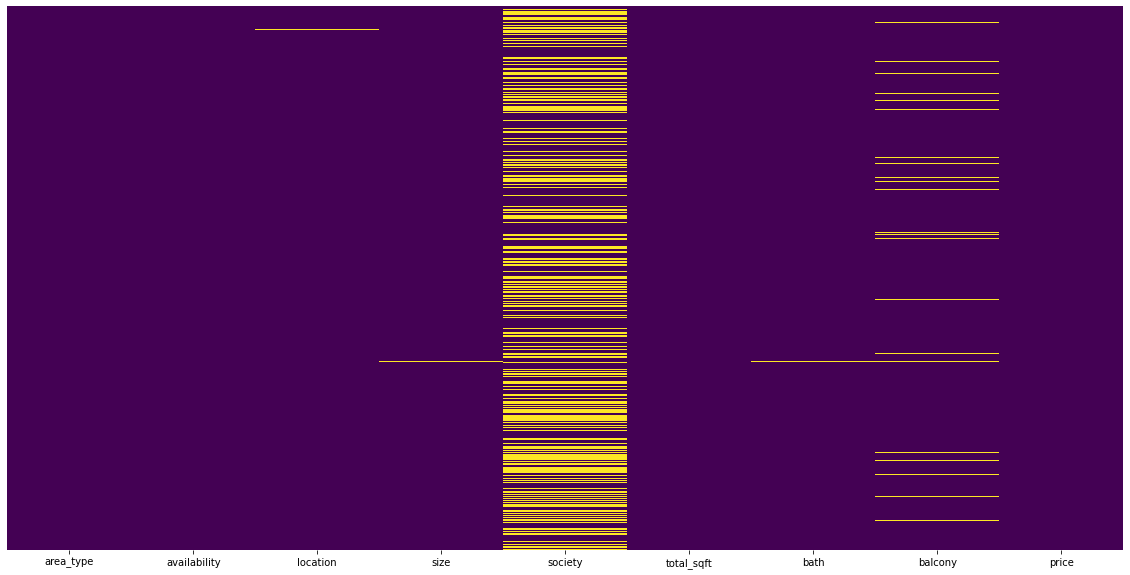

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

####  Handeling Missing Data

In [103]:
''' Society column has around 50% of data missing so due to this we will drop this feature. '''
df.drop('society',axis=1,inplace=True)

In [104]:
''' balcony column has 0.5% of data missing which we can drop but it is wiser to fill these with the average value of balcony. '''
df['balcony'].fillna(round(df['balcony'].mean(),2),inplace=True)

In [105]:
''' Now since majority of missing data is covered/handeled rest of the missing data can be removed. Removing the rows containing
nan/null values in either of its column.'''
df.dropna(inplace=True)

In [106]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [107]:
df.shape

(13246, 8)

#### Data Wrangling

In [108]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.00,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.00,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.58,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.00,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.00,488.00


In [109]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [110]:
''' In the size column some of the values is like 4 Bedroom and some like 4 BHK which is the same thing as only 4 bedroom without
any bathroom and kitchen dosen't make any sence. So we will convert it into a value (1,2,3,...) which is our BHK value.'''

df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop('size',axis=1,inplace=True)

In [111]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [112]:
''' The total_sqft column is string and it has some range values in it like '1133-1384' and some values in other unit but for regression machine learning model
we need to convert it into a float value. 
So we will replace the range value with the average of the two values and we will drop the which are in other units
'''
# Creating a function for the above task

def convert_to_sqft(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2
    try:
        return float(x)
    except:
        return None
    
# Applying the function
    
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)

# but it will result in generation of nan value for total_sqft in other unit so we need to drop those rows.

df.dropna(inplace=True)

## Feature Engineering and Outlier Removal

### Feature engineering

In [113]:
df['availability'].value_counts()

Ready To Move    10525
18-Dec             296
18-May             290
18-Apr             269
18-Aug             199
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [114]:
''' Since we have too many dates in the availability column we will convert it into a new category with value 0 for not available
 to move in and 1 for ready to move in.'''

df['availability'] = df['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0)

In [115]:
df['location'].value_counts()

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [116]:
''' Now moving on to the location column we can see that there are about 1300 unique location but if we convert all of then to 
dummy variable it will make 1300 columns which can make our model slow. So we will convert all the location for which count is 
less then 10 into a new category called other and doing this will substantially reduce the number of dummy variables. '''

df_new = df.groupby('location')['location'].count().sort_values(ascending=False)
other = df_new[df_new<=10]
df['location'] = df['location'].apply(lambda x: x.strip())
df['location'] = df['location'].apply(lambda x: 'other' if x in other else x)
df['location'].nunique()

270

In [117]:
''' When ever we talk about estimating the house price one of the most important feature which is consider is the price per 
squre feet so we will make a feature for this. This feature will be used for outlier detection and then we will remove it'''

df['price_per_sqft'] = df['price']*100000/df['total_sqft']

### Outlier Removal

##### After collecting some domain knowledge we came to some criteria to remove outliers

In [118]:
''' 1. total_sqft/bhk gives a rough estimate of the average size of room which can be must be greater then 200. 
Room size less then 200 sqft do not make any sense.'''

df = df[df.total_sqft/df.bhk>300]

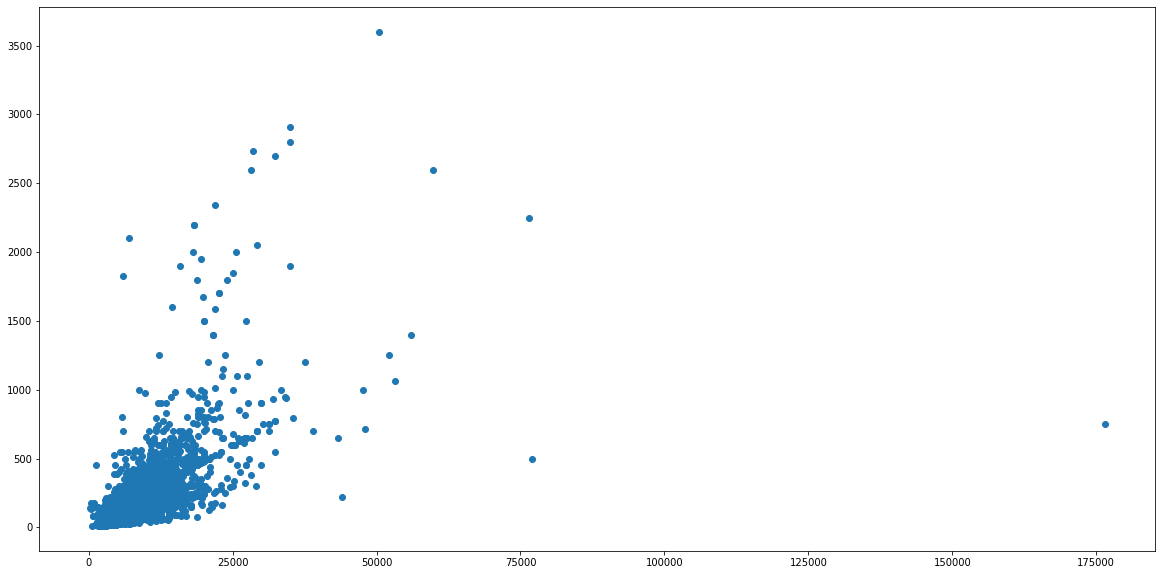

In [119]:
plt.figure(figsize=(20,10))
plt.scatter(x=df['price_per_sqft'],y=df['price'])

In [120]:
df.shape

(12274, 9)

In [121]:
''' 2. price_per_sqft is very less/very high which is well below/above the average price_per_sqft at that area, we will consider 
them outlier and remove them. Assuming that our price_per_sqft data is in normal destribution 68% data will be covered within
1 standard deviation from mean. '''

# creating the function

def pps_outliers(df):
    df_output = pd.DataFrame()
    for loc, value in df.groupby('location'):
        mean = np.mean(value.price_per_sqft)
        std  = np.std(value.price_per_sqft)
        df_reduced = value[(value.price_per_sqft>(mean-std))&(value.price_per_sqft<=(mean+std))]
        df_output = pd.concat([df_output,df_reduced],ignore_index=True)
    return df_output

# applying the function

df = pps_outliers(df)

    

In [122]:
df.shape

(9988, 9)

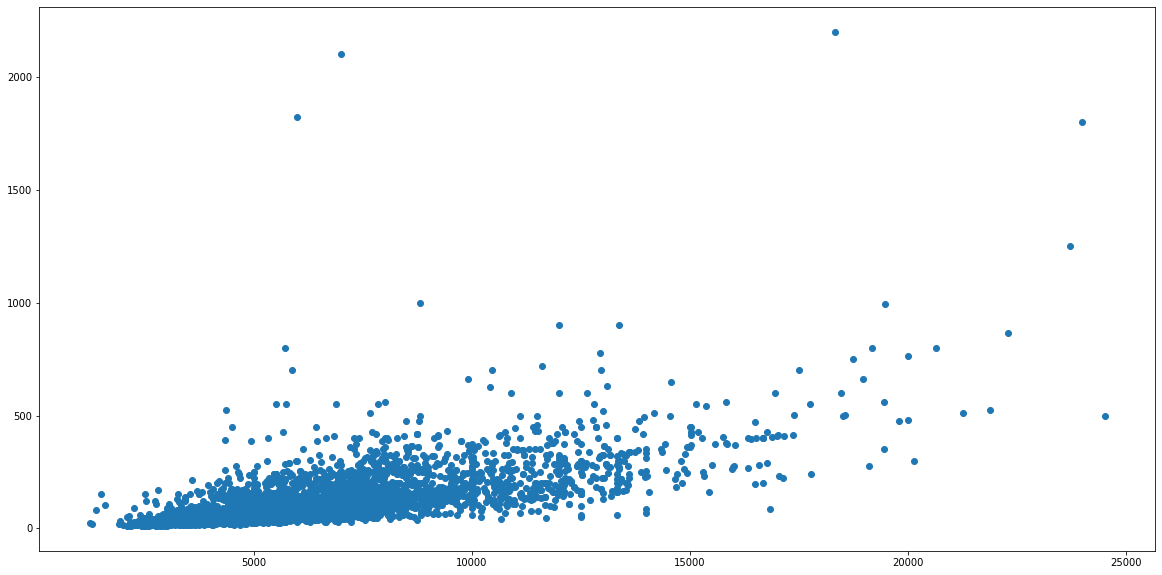

In [123]:
plt.figure(figsize=(20,10))
plt.scatter(x=df['price_per_sqft'],y=df['price'])

''' We have not removed all the outlier as it may lead to overfitting. We only removed extream outlier/errors in the data. '''

In [124]:
''' 3. We observed that for same location and approx. same size some 2 BHK house has greater price then 3 BHK house so we want to  
remove them. '''

# lets create a scatter plot to see this observation

def scatter_plot(df,loc):
    bhk2 = df[(df.location == loc)&(df.bhk == 2)]
    bhk3 = df[(df.location == loc)&(df.bhk == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(x = bhk2.total_sqft , y = bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(x = bhk3.total_sqft, y= bhk3.price, color = 'green', label = '3 BHK', s = 50, marker = '*')

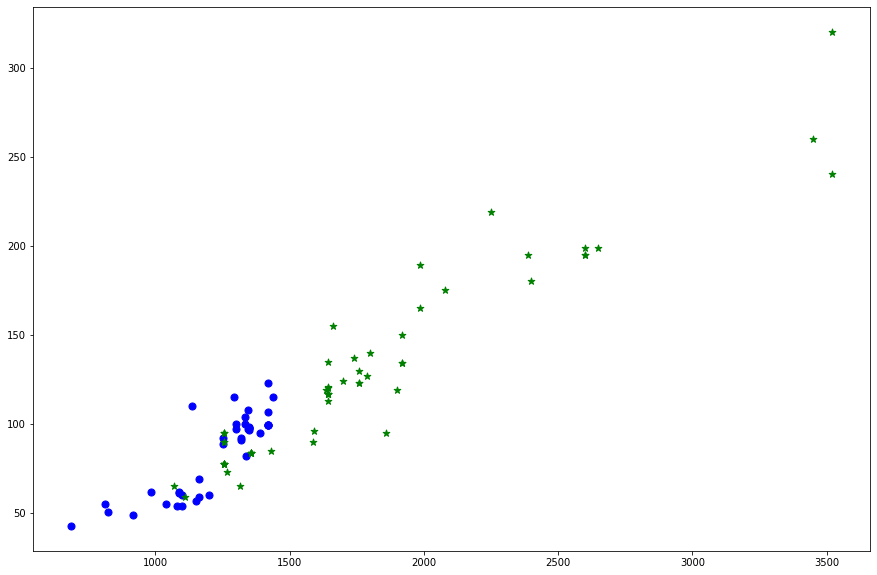

In [125]:
scatter_plot(df,'Hebbal')

In [126]:
df.shape

(9988, 9)

In [127]:
''' Creating a function which will remove the data point for which lower bhk value price is grater then higher bhk value price 
per location. '''

def bhk_outliers(df):
    indices_excluded = np.array([])
    for loc, loc_df in df.groupby('location'):
        bhk_disc = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_disc[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': len(bhk_df)
            }
            
        for bhk, bhk_df in loc_df.groupby('bhk'):
            pre_stats = bhk_disc.get(bhk-1)
            if pre_stats and pre_stats['count'] > 5:
                indices_excluded = np.append(indices_excluded, bhk_df[bhk_df.price_per_sqft<(pre_stats['mean'])].index.values)
    return df.drop(indices_excluded,axis='index')

df = bhk_outliers(df)
df.shape
            
    

(7133, 9)

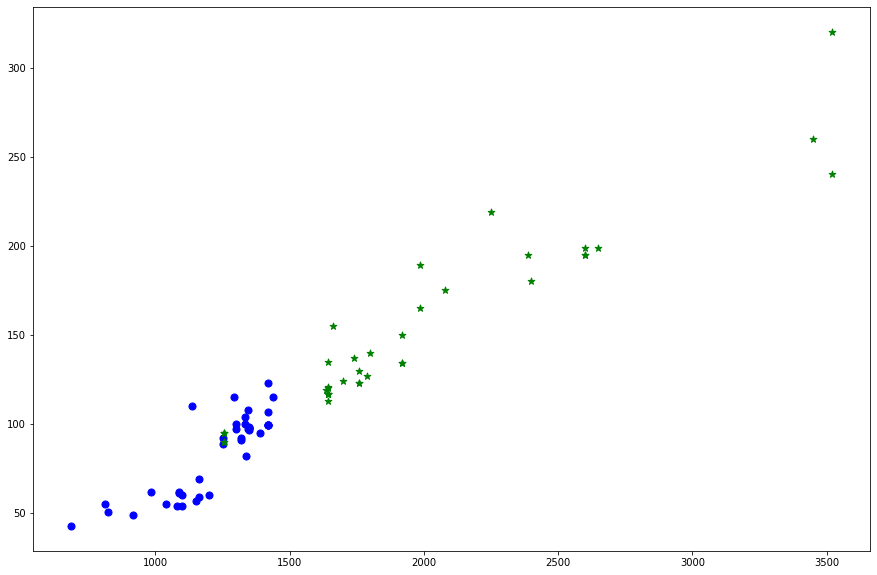

In [128]:
scatter_plot(df,'Hebbal')

Text(0.5, 1.0, 'BHK VS BATH ROOM')

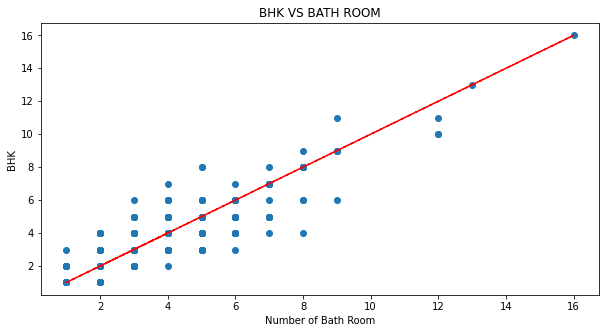

In [129]:
''' 4. From the below graph we can see that there are some house in which number of bath room is much greater then number of rooms 
(BHK) is do not make sence in real world scenario so we will remove those house which has 2 more bathroom then BHK. '''

plt.figure(figsize=(10,5))
plt.scatter(x=df.bath,y=df.bhk)
plt.plot(df.bath,df.bath,color='red', linestyle='--')
plt.xlabel('Number of Bath Room')
plt.ylabel('BHK')
plt.title('BHK VS BATH ROOM')

In [130]:
# Removing Bathroom Outlier
df = df[~(df.bath > df.bhk + 2)]

In [131]:
df.shape

(7129, 9)

In [132]:
# Since we already have total_sqft we do not need price_per_sqft. We created it only for removing outliers.

df.drop('price_per_sqft',axis=1,inplace=True)

## Exploratory Data Analysis 2

In [133]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,0,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


<AxesSubplot:xlabel='area_type', ylabel='price'>

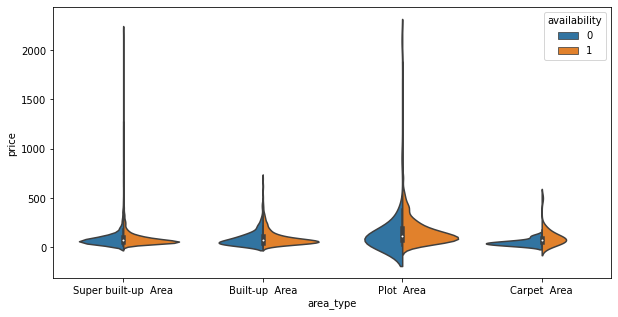

In [134]:
plt.figure(figsize=(10,5))
sns.violinplot(x='area_type',y='price',hue='availability',split=True , data=df)

# we can see that all the categories are in normal destribution and there mean/median are almost same.

<AxesSubplot:xlabel='balcony', ylabel='price'>

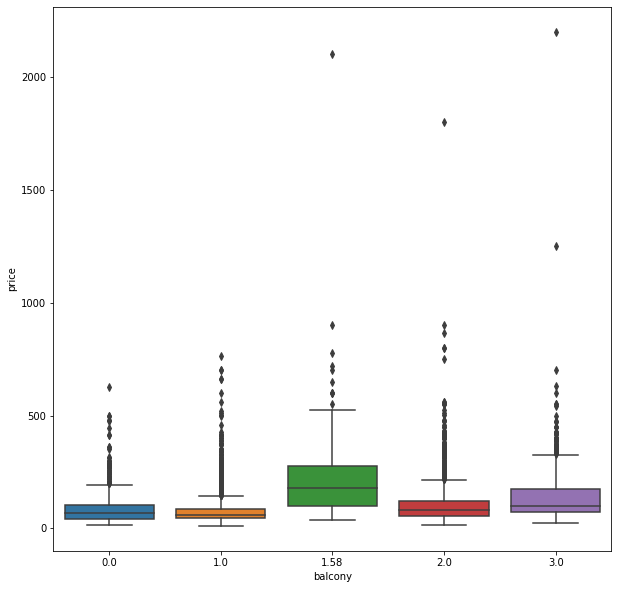

In [135]:
plt.figure(figsize=(10,10))
sns.boxplot(x='balcony',y='price',data=df)

In [136]:
''' we can clearly see that the house for which balcony was not present and we took the average, they are having price much high
then other category so we need to drop these house. '''

df = df[~(df['balcony']==1.58)]

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


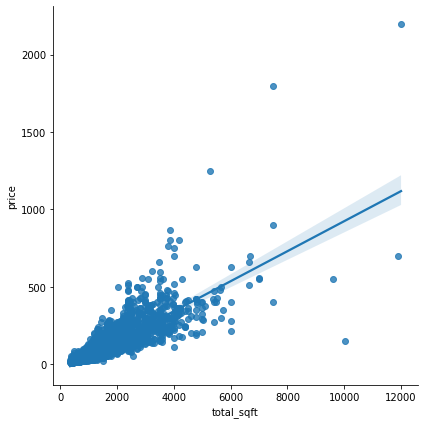

In [137]:
sns.lmplot(x='total_sqft',y='price',data=df, palette='coolwarm',size=6)

''' We can see that our house price has a linear relationship with the total_sqft which also makes sence because bigger the size 
of the house logically it should we expensive. '''

<AxesSubplot:>

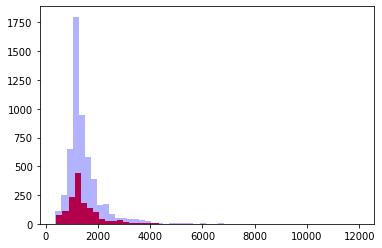

In [138]:
df[df['availability']==0]['total_sqft'].hist(bins=50,grid=False,color='red')
df[df['availability']==1]['total_sqft'].hist(bins=50,grid=False, alpha=.3,color='blue')

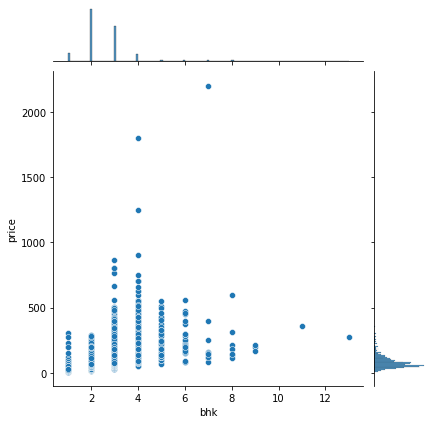

In [139]:
sns.jointplot(x='bhk',y='price',data=df)

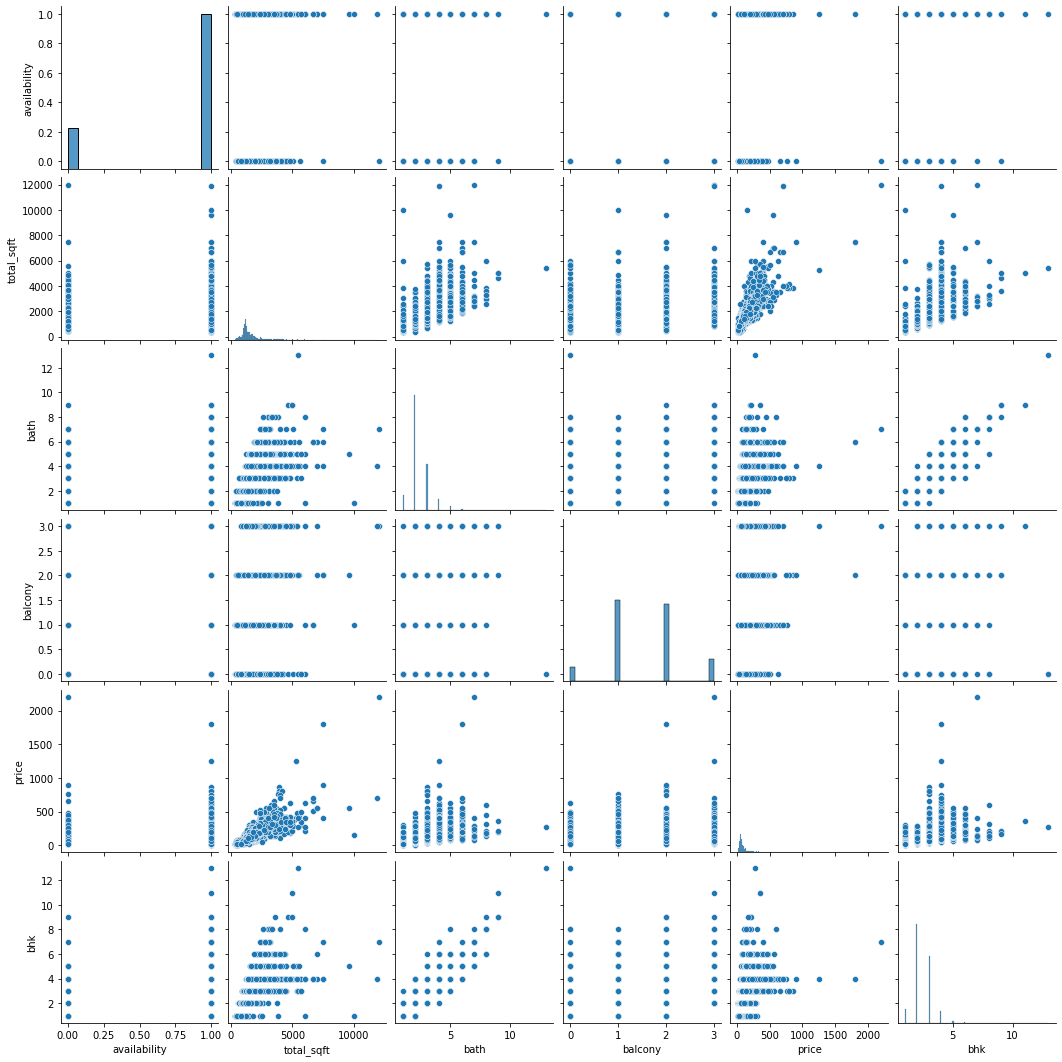

In [140]:
sns.pairplot(df,palette='coolwarm')

''' we can see the relation of each feature with each other. '''

<AxesSubplot:>

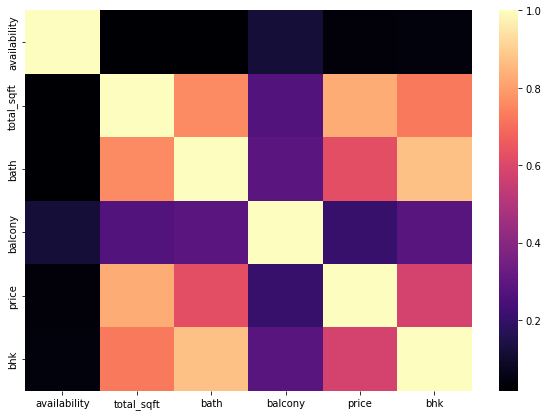

In [141]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='magma')

''' we can see the correlation of each feature with each other'''

## Model Building

#### Dummy Variables

In [142]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,0,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
...,...,...,...,...,...,...,...,...
9978,Carpet Area,0,other,1200.0,2.0,3.0,70.0,2
9979,Super built-up Area,1,other,1800.0,1.0,1.0,200.0,1
9982,Super built-up Area,1,other,1353.0,2.0,2.0,110.0,2
9983,Plot Area,0,other,812.0,1.0,0.0,26.0,1


''' Since our hotarea_type column and location are string but an ML model can only use numarical values we will both these column
into dummy column for each category using one hot encoding. '''


In [146]:
dummy1 = pd.get_dummies(df.location)
dummy2 = pd.get_dummies(df.area_type)

In [156]:
df_new = pd.concat([df,dummy1.drop('other',axis=1),dummy2.drop('Built-up  Area',axis=1)],axis=1)

In [162]:
df = df_new.drop(['area_type','location'],axis=1)

In [163]:
df

,availability,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south,Carpet Area,Plot Area,Super built-up Area
0,0,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0,1200.0,2.0,3.0,70.0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9979,1,1800.0,1.0,1.0,200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9982,1,1353.0,2.0,2.0,110.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9983,0,812.0,1.0,0.0,26.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [164]:
df.columns

Index(['availability', 'total_sqft', 'bath', 'balcony', 'price', 'bhk',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Whitefield,', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'south', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'],
      dtype='object', length=260)

#### Splitting 

In [165]:
''' Splitting our data into independent variable and dependent variable or we can say into input and output of our model'''
indep_var = df.drop('price',axis=1)
dep_var = df.price


In [166]:
indep_var


,availability,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south,Carpet Area,Plot Area,Super built-up Area
0,0,2850.0,4.0,1.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1630.0,3.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1875.0,2.0,3.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1200.0,2.0,0.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1235.0,2.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0,1200.0,2.0,3.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9979,1,1800.0,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9982,1,1353.0,2.0,2.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9983,0,812.0,1.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [167]:
dep_var


0       428.0
1       194.0
2       235.0
3       130.0
4       148.0
        ...  
9978     70.0
9979    200.0
9982    110.0
9983     26.0
9987    480.0
Name: price, Length: 6916, dtype: float64

In [168]:
''' Spliting our data into training data and testing data. Training data is used for building our model and testing data will 
be used for model evaluation '''

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(indep_var,dep_var,test_size=0.25,random_state=101)


#### Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=False)
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.8650588277053742

#### Predictions

In [170]:
predictions = model.predict(x_test)

#### Model Evaluation

In [171]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 Score: ',metrics.r2_score(y_test,predictions))

Mean Absolute Error:  16.150565563555464
Mean Squared Error:  777.3129569478443
Root Mean Squared Error:  27.88033279836961
R2 Score:  0.8650588277053742


In [172]:
df['price'].mean()

94.81060078079815

In [173]:
df['price'].std()

84.94605078963177

We can see that our r2 value is .86 which is a vary good value and it indicates that there is neither overfitting nore underfitting in our model. We can also observe that our mean absolute error is about 15% of mean which is also good. We can also
observe that our MSE and RMSE are much less then std which also indicate the goodness of our model.

## Hyper Parameter Tuning

#### CrossValidation

In [174]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [175]:
cv = ShuffleSplit(n_splits=5,test_size=.25,random_state=101)
cross_val_score(LinearRegression(),indep_var,dep_var, cv=cv)

array([0.86505883, 0.84492204, 0.81072016, 0.82523922, 0.79748485])

#### Hyper Parameter Tuning

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
# outer then linear regression we will also try support vector machine and Decision Tree regression.

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [178]:
# creating parameter grid for different model.

''' we will create a function  which takes our independent variable and dependent variable and return an dataframe with the best 
possible values of parameter for each of our model.'''

def best_model_parameters(x,y):
    param_grid = {
        'Linear Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'selection' : ['random','cyclic'],
                'alpha' : [1,2],
            }
        },
        'Random Forest' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [5,25,50]
            }
        }
    }
    
    # list of dictionary to store best parameters for each model.
    scores= []
    
    # Making an empty list for converting scores into dataframe.
    l = list()
    
    # Creating Cross-Validation Function.
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=101)
    
    # Applying grid search cv.
    for model_name, model in param_grid.items():
        gscv = GridSearchCV(model['model'],model['params'],cv=cv, return_train_score=False)
        gscv.fit(x,y)
        scores.append({
            'Model' : model_name,
            'Best_Params' : gscv.best_params_,
            'Best_Score' : gscv.best_score_
        })
        
    for i in range(len(scores)):
        l.append(list(scores[i].values()))
        
    return pd.DataFrame(l)




In [179]:
best_model_parameters(indep_var,dep_var)

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previou

,0,1,2
0,Linear Regression,{'normalize': False},0.834260
1,Lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.691888
2,Random Forest,{'n_estimators': 25},0.765185


##### We can clearly see that our Linear Regession Model outperforms Lasso Regression Model and Random Forest Model so we will be using Linear Regression for our property price predictions

## Predictions

In [180]:
indep_var


,availability,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south,Carpet Area,Plot Area,Super built-up Area
0,0,2850.0,4.0,1.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1630.0,3.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1875.0,2.0,3.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1200.0,2.0,0.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1235.0,2.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0,1200.0,2.0,3.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9979,1,1800.0,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9982,1,1353.0,2.0,2.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9983,0,812.0,1.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [182]:
# Now we will create a predict price function to predict price for given features.

def predict_price(location,area_type,availability,total_sqft,bath,balcony,bhk):
    
    if location == 'other':
        location_index = 0
    else:
        location_index = np.where(indep_var.columns == location)[0][0]
        
    if area_type == 'Built-up  Area':
        area_type_index = 0
    else:
        area_type_index = np.where(indep_var.columns == area_type)[0][0]
        
    
    x = np.zeros(len(indep_var.columns))
    
    
    x[0] = availability
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    x[4] = bhk
    
    if location_index>0:
        x[location_index] = 1
    
    if area_type_index >0:
        x[area_type_index] =1
        
    return model.predict([x])[0]
    
    

#### Observation

In [183]:
predict_price('1st Phase JP Nagar','Super built-up  Area',1,1000,2,0,2)

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.23505293636762

In [184]:
predict_price('1st Phase JP Nagar','Super built-up  Area',1,1200,3,1,3)

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.24032665288293

We can see that price of a 3 BHK house is grater then 2 BHK which indictes that our model performs realistic 

In [185]:
predict_price('Indira Nagar','Super built-up  Area',1,1000,2,0,2)

C:\Users\H261529\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.42392681979945

we can see that house price in Indira Nagar is grater then 1st Phase JP Nagar which is true in real life scenario.

## Exporting our Model

In [189]:
''' Exporting our model as a pickle file(artifact) which will be consumed by our python server. This file contains our model
parameters. Size of this file will we very less as it contains only the weights(slopes) and biase(intersept) it will not contain
the data on which our model is build.'''

import pickle
with open('BHP_Model.pickle','wb') as m:
    pickle.dump(model,m)

In [190]:
''' Exporting our model feature as a json file. This will be used when we are reading the input from our webpage'''

import json
columns = {
    'data_columns' : [col.lower() for col in indep_var.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))